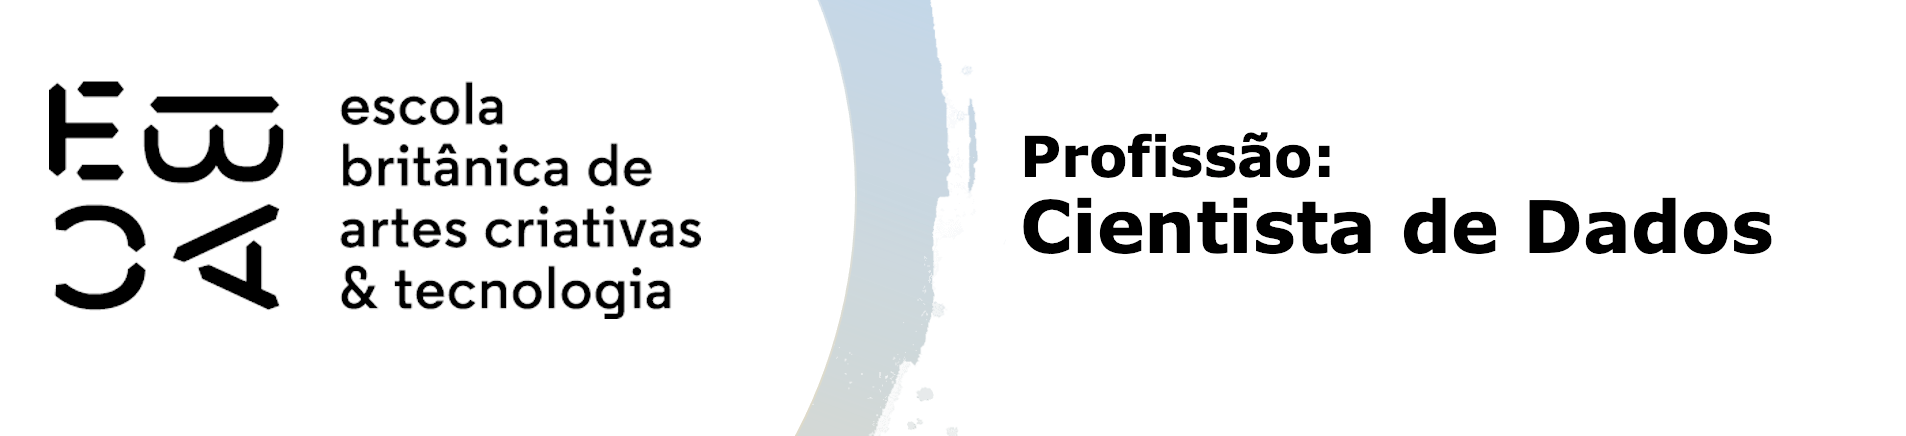

# Métodos hierárquicos de agrupamento - Tarefa

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

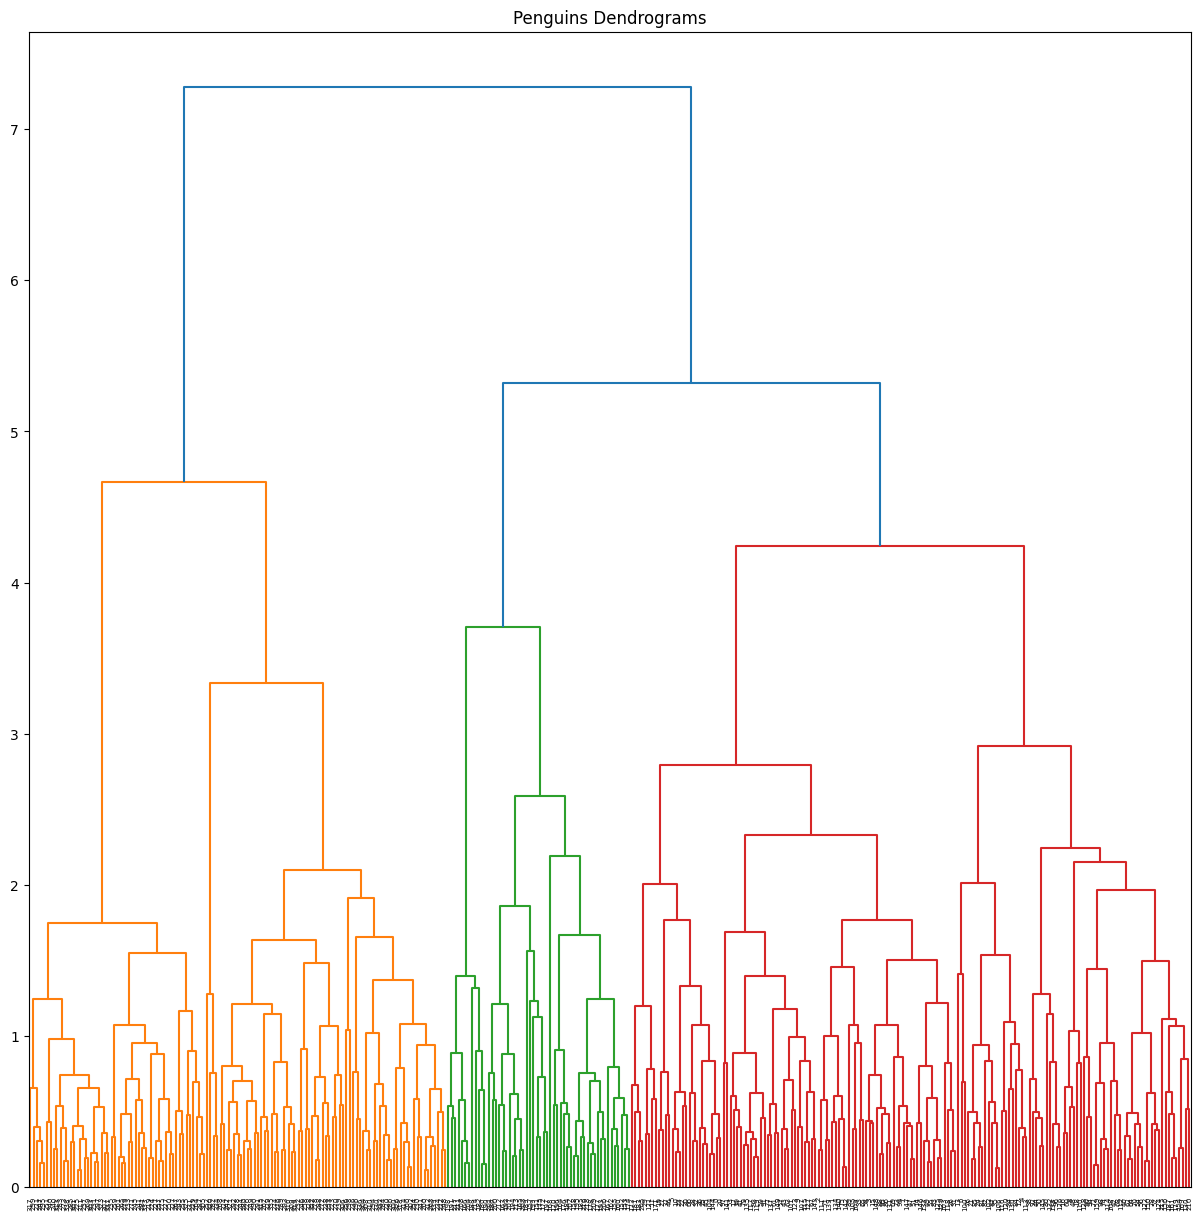

In [2]:
# Carregando a base de dados de pinguins (certifique-se de ter os dados carregados corretamente)
peng = sns.load_dataset('penguins')
peng.index.name='id'

# Selecionando as variáveis quantitativas
peng_num = peng.select_dtypes('number').dropna()

# Padronizando as variáveis
peng_pad = StandardScaler().fit_transform(peng_num)

# Realizando o agrupamento hierárquico com 3 grupos
clus_3 = AgglomerativeClustering(linkage="complete", 
                                 distance_threshold = None, 
                                 n_clusters=3)

# Treinando o algoritmo
clus_3.fit(peng_pad)

# Plotando o dendrograma
plt.figure(figsize=(15, 15))
plt.title("Penguins Dendrograms")
dend = shc.dendrogram(shc.linkage(peng_pad, method='complete'))

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [3]:
# Criando um DataFrame temporário com os rótulos de cluster de 3 grupos
temp_df_3 = pd.DataFrame({'grupo_3': clus_3.labels_}, index=peng_num.index)

In [4]:
# Mesclando o DataFrame temporário com o DataFrame original 'peng'
peng = peng.merge(temp_df_3, how='left', left_index=True, right_index=True)

In [5]:
# Criando uma tabela de contingência cruzada entre espécies e grupos
pd.crosstab(peng['species'], peng['grupo_3'])

grupo_3,0.0,1.0,2.0
species,,,
Adelie,0,151,0
Chinstrap,0,14,54
Gentoo,123,0,0


/Users/tsumano/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


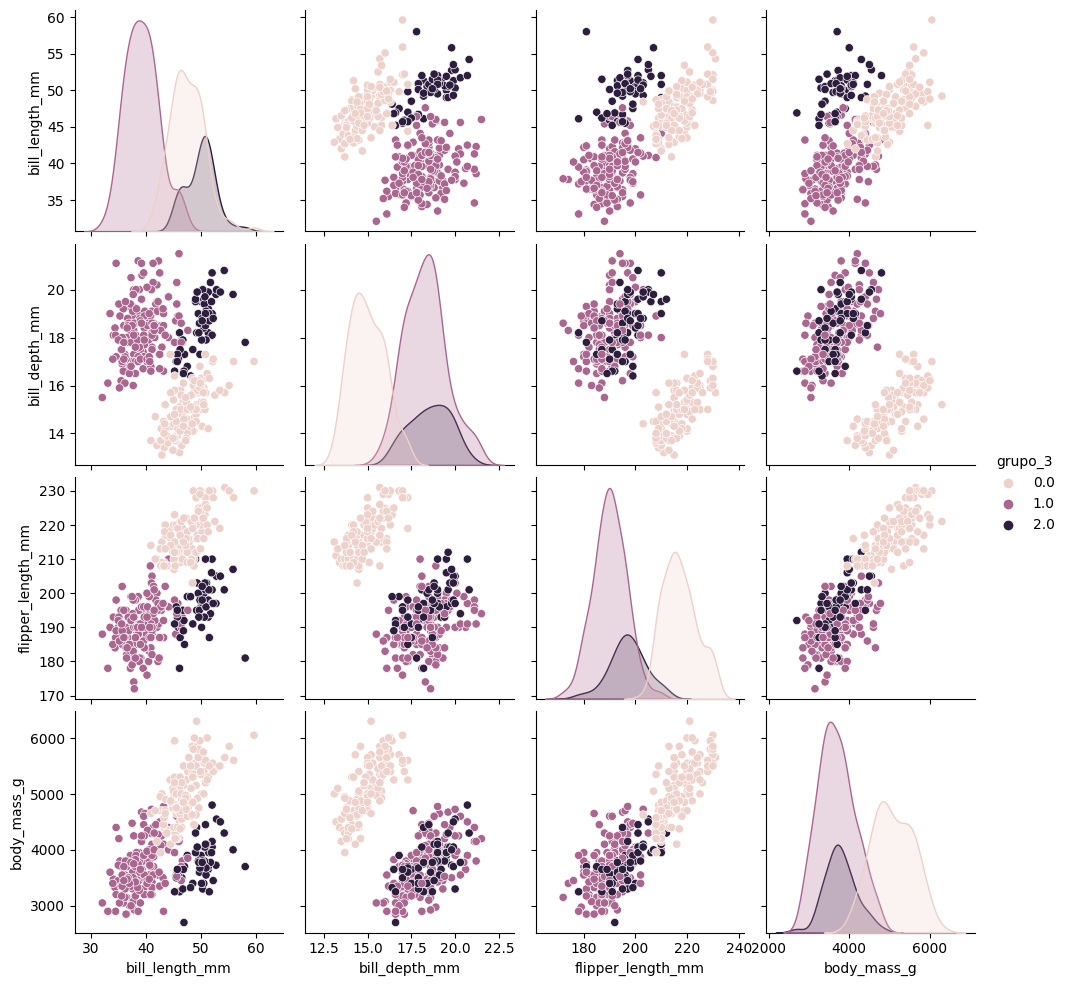

In [6]:
# Criando um gráfico pairplot para visualizar as relações entre variáveis, colorido pelos grupos
sns.pairplot(data=peng, hue='grupo_3')

<span style="color: darkolivegreen;"> Análise: As variáveis quantitativas incluem comprimento do bico, profundidade do bico, comprimento da nadadeira e massa corporal.<br>
Grupo 0: Caracteriza-se por maiores valores de massa corporal e comprimento da nadadeira, mas menores valores de profundidade do bico.<br>
Grupo 1: Destaca-se por possuir menores valores de comprimento do bico.<br>
Grupo 2: É distinto devido a maiores valores de comprimento do bico.<br>
Três variáveis definem o Grupo 0, enquanto a quarta variável distingue os Grupos 1 e 2.</span>

## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

In [7]:
clus_6 = AgglomerativeClustering(linkage="complete", 
                                 distance_threshold=None, 
                                 n_clusters=6)
clus_6.fit(peng_pad)

# Criando um DataFrame temporário com os rótulos de cluster de 6 grupos
temp_df_6 = pd.DataFrame({'grupo_6': clus_6.labels_}, index=peng_num.index)

# Mesclando o DataFrame temporário com o DataFrame 'peng'
peng = peng.merge(temp_df_6, how='left', left_index=True, right_index=True)
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,grupo_3,grupo_6
id,,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.0,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.0,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1.0,1.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.0,1.0


In [8]:
# Quantos pinguins de cada espécie estão em cada grupo (6 grupos)
pd.crosstab(peng['species'], peng['grupo_6'])

grupo_6,0.0,1.0,2.0,3.0,4.0,5.0
species,,,,,,
Adelie,0,91,60,0,0,0
Chinstrap,0,5,9,0,42,12
Gentoo,71,0,0,52,0,0


In [9]:
# Quantos pinguins de cada espécie, machos e fêmeas, estão em cada grupo (6 grupos)
pd.crosstab([peng['species'], peng['sex']], peng['grupo_6'])

grupo_6           0.0  1.0  2.0  3.0  4.0  5.0
species   sex                                 
Adelie    Female    0   69    4    0    0    0
          Male      0   18   55    0    0    0
Chinstrap Female    0    5    9    0   20    0
          Male      0    0    0    0   22   12
Gentoo    Female    9    0    0   49    0    0
          Male     61    0    0    0    0    0

In [10]:
# Proporção de pinguins de cada espécie, machos e fêmeas, em cada grupo (6 grupos)
pd.crosstab([peng['species'], peng['sex']], peng['grupo_6'], normalize='index')

grupo_6                0.0       1.0       2.0       3.0       4.0       5.0
species   sex                                                               
Adelie    Female  0.000000  0.945205  0.054795  0.000000  0.000000  0.000000
          Male    0.000000  0.246575  0.753425  0.000000  0.000000  0.000000
Chinstrap Female  0.000000  0.147059  0.264706  0.000000  0.588235  0.000000
          Male    0.000000  0.000000  0.000000  0.000000  0.647059  0.352941
Gentoo    Female  0.155172  0.000000  0.000000  0.844828  0.000000  0.000000
          Male    1.000000  0.000000  0.000000  0.000000  0.000000  0.000000

/Users/tsumano/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


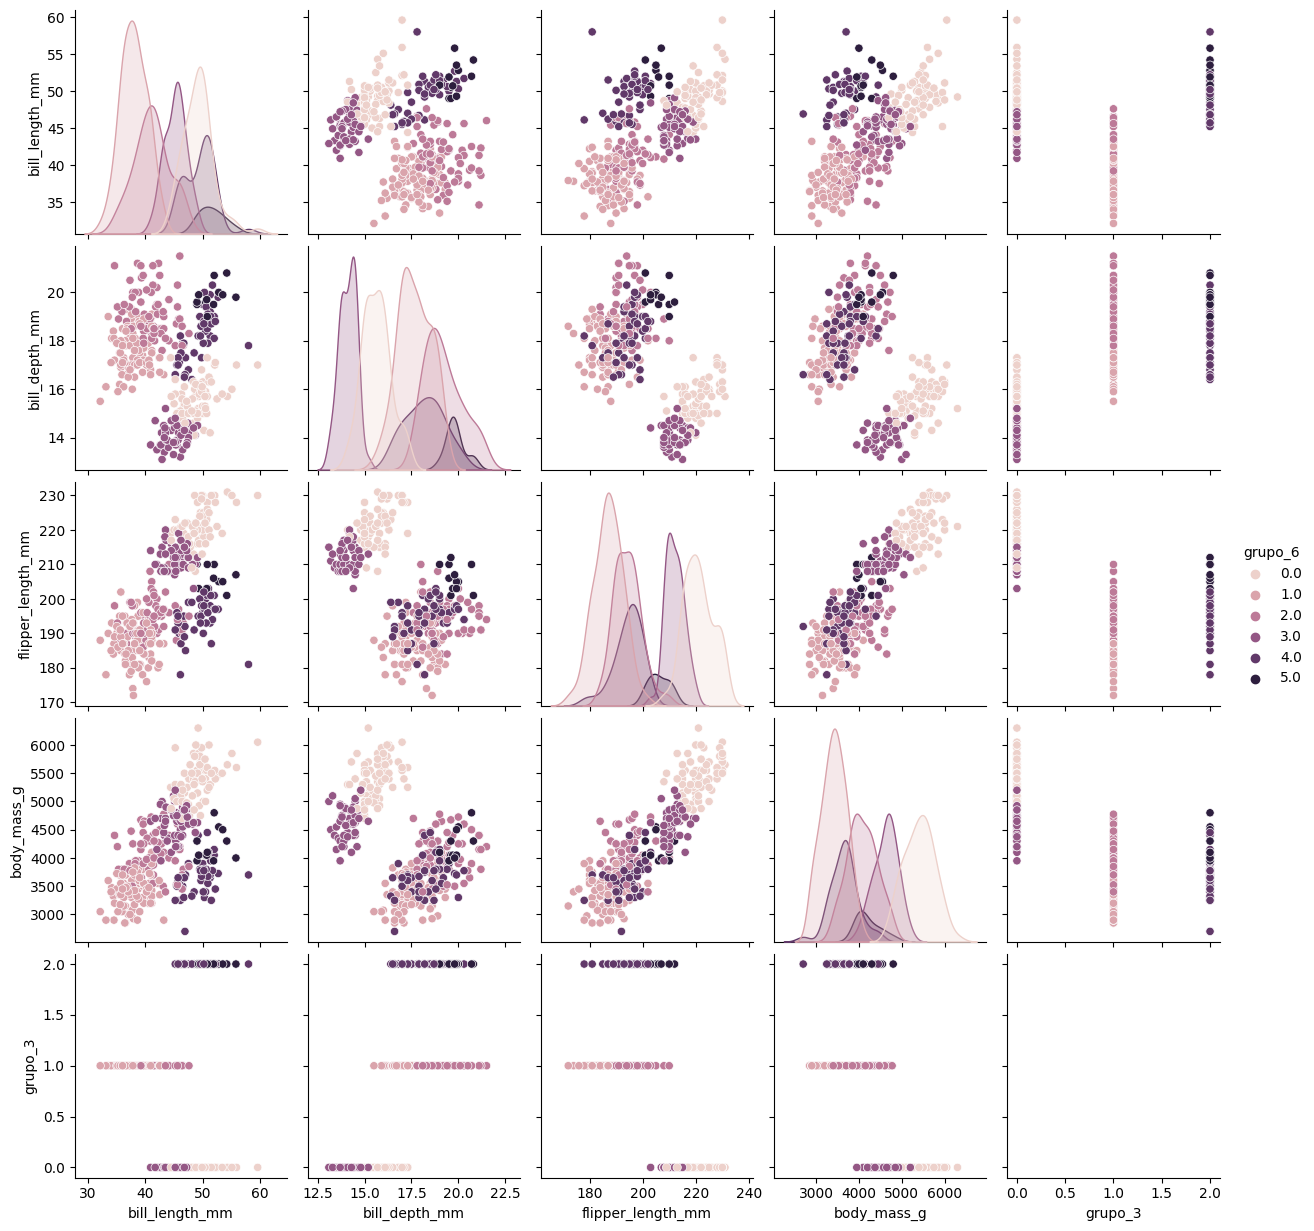

In [11]:
# Plotando gráficos de dispersão das variáveis com relação aos grupos (6 grupos)
sns.pairplot(data=peng, hue='grupo_6')

<span style="color: darkolivegreen;">Observamos padrões distintos em diferentes grupos. Os grupos 0 e 3 revelam uma diferenciação clara entre machos e fêmeas da espécie Gentoo. Os grupos 1 e 2 também destacam uma distinção nítida entre machos e fêmeas da espécie Adelie. No entanto, nos grupos 4 e 5, ocorre uma sobreposição notável entre machos e fêmeas da espécie Chinstrap, resultando em uma menor diferenciação.</span>